### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns

from sklearn import datasets

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

### Load Data

In [5]:
X, color = datasets.samples_generator.make_swiss_roll(n_samples = 2000)

print ("Shape of X : ", X.shape)
print ("Shape of color : ", color.shape)

Shape of X :  (2000, 3)
Shape of color :  (2000,)


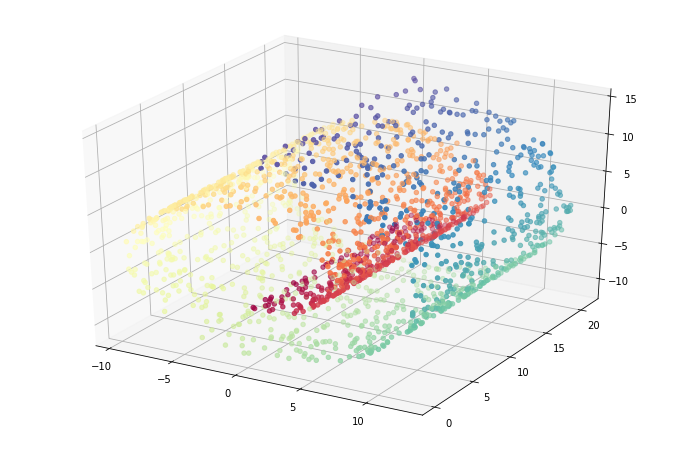

In [6]:
X = pd.DataFrame(X)

ax = plt.subplots(figsize=(12, 8))
ax = plt.axes(projection ='3d')

ax.scatter3D(X[0], X[1], X[2], c = color, cmap = plt.cm.Spectral);

### Manifold Learning

In [7]:
def apply_manifold_learning(X, method):
    
    X = method.fit_transform(X)
    
    print ("New shape of X : ", X.shape)
    
    X = pd.DataFrame(X)
    
    plt.subplots(figsize = (12, 10))
    plt.axis('equal');

    plt.scatter(X[0], X[1], c = color, cmap = plt.cm.Spectral)
    plt.xlabel('X[0]')
    plt.ylabel('X[1]');
    
    return method

### Apply MDS
* n_components : Number of dimensions in which to immerse the dissimilarities.
* metric : If True, perform metric MDS; otherwise, perform nonmetric MDS.
* embedding_ :Stores the position of the dataset in the embedding space.
* stress_ : The final value of the stress (sum of squared distance of the disparities and the distances for all constrained points).

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html

New shape of X :  (2000, 2)


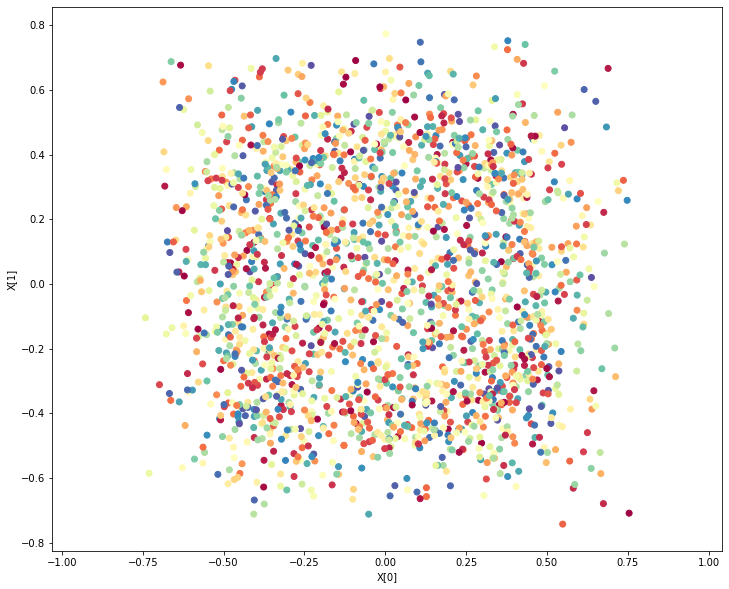

In [8]:
from sklearn.manifold import MDS

mds = apply_manifold_learning(X, MDS(n_components = 2, metric = False))

New shape of X :  (2000, 2)


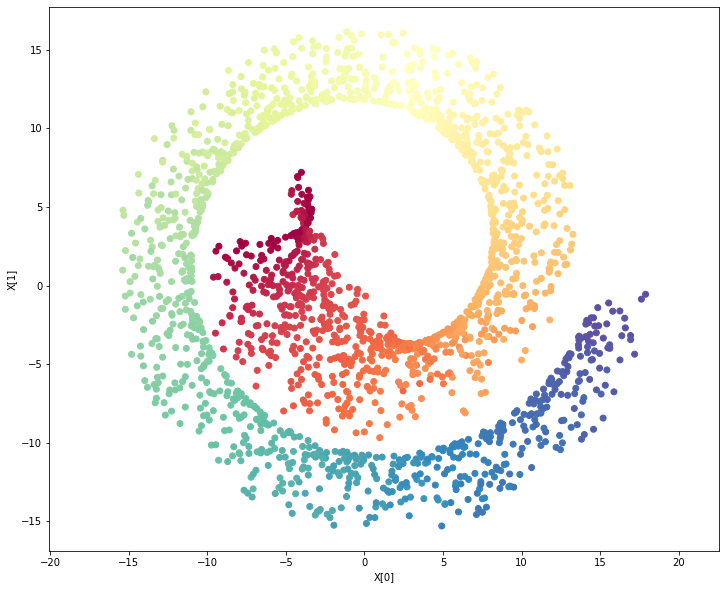

In [9]:
mds = apply_manifold_learning(X, MDS(n_components = 2, metric = True))

### Apply LLE
* n_neighbors :number of neighbors to consider for each point.

* n_components : number of coordinates for the manifold
* method : ‘standard’, ‘hessian’, ‘modified’ or ‘ltsa’
    * standard : use the standard locally linear embedding algorithm. 

    * hessian : use the Hessian eigenmap method. This method requires n_neighbors > n_components * (1 + (n_components + 1) / 2 

    * modified : use the modified locally linear embedding algorithm.
    * ltsa : use local tangent space alignment algorithm
* embedding_ : Stores the embedding vectors

* reconstruction_error_ : Reconstruction error associated with embedding_

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html

New shape of X :  (2000, 2)


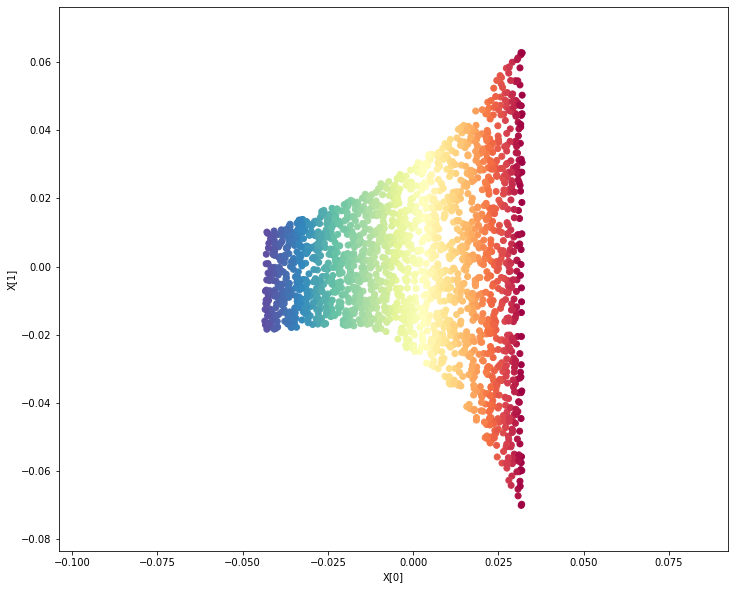

In [10]:
from sklearn.manifold import LocallyLinearEmbedding

lle = apply_manifold_learning(X, LocallyLinearEmbedding(n_neighbors = 15, 
                                                        n_components = 2, 
                                                        method = 'standard') ) 

### Apply HLLE

* embedding_ : Stores the embedding vectors

* reconstruction_error_ : Reconstruction error associated with embedding_

New shape of X :  (2000, 2)


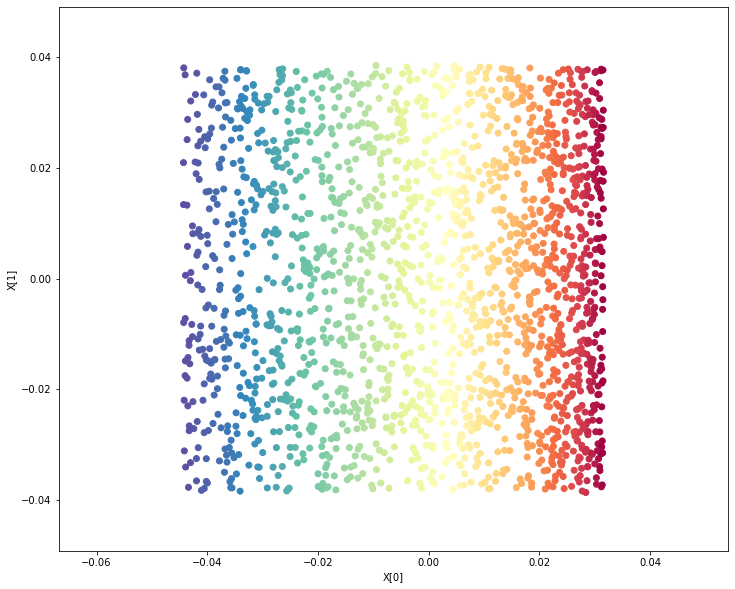

In [11]:
hlle = apply_manifold_learning(X, LocallyLinearEmbedding(n_neighbors = 15, 
                                                         n_components = 2, 
                                                         method = 'hessian'))